### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 





## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). 

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np


# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings


warnings.filterwarnings("ignore")

%load_ext nb_black



<IPython.core.display.Javascript object>

In [2]:
rene = pd.read_csv("Downloads/Train.csv.csv")  
rene_Test = pd.read_csv("Downloads/Test.csv.csv")


<IPython.core.display.Javascript object>

Loadng the training set and the testing set

In [3]:
data = rene
data2 = rene_Test

<IPython.core.display.Javascript object>

## Data Overview

In [4]:
data.shape

(20000, 41)

<IPython.core.display.Javascript object>

In [5]:
data2.shape

(5000, 41)

<IPython.core.display.Javascript object>

The trainig set has 20,000 rows and 41 columns.
The testing test has 5,000 rows and 41 columns.

### Displaying the first few rows of the dataset

In [6]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


<IPython.core.display.Javascript object>

In [7]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


<IPython.core.display.Javascript object>

There are negative values in the data sets; data collected from the sensors.

### Statistical summary of the dataset

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

In [9]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


<IPython.core.display.Javascript object>

The datasets seems to be evenly distributed, will confirm distribution on EDA.

### Checking the data types of the columns for the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

### Checking for missing values

In [11]:
data.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
data2.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

V1 and V2 from the training(18) and testing(5 and 6 respectively) datasets have missing values.

In [13]:
data.isnull().values.any()

True

<IPython.core.display.Javascript object>

In [14]:
bool_series = pd.isnull(data["V1"])
bool_series3 = pd.isnull(data["V2"])

<IPython.core.display.Javascript object>

In [15]:
data[bool_series]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
89,NaN,-3.961,2.788,-4.713,-3.007,-1.541,-0.881,1.477,0.575,-1.101,-1.847,4.541,4.490,0.710,-2.138,-2.026,0.136,2.792,-1.167,4.870,-3.924,1.493,-0.173,-6.471,3.008,-3.134,3.956,-1.898,-0.642,-0.538,-1.876,-8.326,-5.141,1.121,-0.306,5.315,3.750,-5.631,2.372,2.196,0
5941,NaN,1.008,1.228,5.397,0.064,-2.707,-2.028,0.534,3.007,-2.362,-5.713,-1.620,-0.046,-0.511,-3.030,-4.996,6.425,0.773,1.235,5.860,-3.851,1.707,1.016,2.310,1.162,0.388,-4.908,1.453,-2.539,-0.518,-2.749,1.870,-3.115,-0.550,1.714,-2.257,0.411,-3.434,-1.299,-1.769,0
6317,NaN,-5.205,1.998,-3.708,-1.042,-1.593,-2.653,0.852,-1.310,2.407,-2.696,3.517,6.080,1.893,-6.296,-2.354,-3.713,4.059,-0.373,1.624,-5.273,2.433,2.354,0.062,-0.469,-1.308,1.865,-2.446,-2.908,1.166,1.492,3.074,-0.068,-0.278,3.197,7.016,1.302,-4.580,2.956,-2.363,0
6464,NaN,2.146,5.004,4.192,1.428,-6.438,-0.931,3.794,-0.683,-0.739,-8.189,6.676,4.109,-0.653,-4.763,-1.715,4.042,-0.464,4.026,3.830,-5.310,0.926,2.933,4.457,-0.354,4.864,-5.043,-0.770,-5.669,-2.644,1.855,5.231,-5.113,1.746,2.587,3.991,0.611,-4.273,1.865,-3.599,0
7073,NaN,2.534,2.763,-1.674,-1.942,-0.030,0.911,-3.200,2.949,-0.413,0.013,-0.483,2.908,-0.942,-0.655,-6.153,-2.604,-0.674,0.767,-2.704,-6.404,2.858,-1.414,-2.859,2.362,3.168,5.590,-1.769,-2.734,-3.304,-0.201,-4.887,-2.612,-1.501,2.036,-0.829,-1.370,0.572,-0.132,-0.322,0
8431,NaN,-1.399,-2.008,-1.750,0.932,-1.290,-0.270,4.459,-2.776,-1.212,-2.049,5.283,-0.872,0.068,-0.667,1.865,3.443,3.297,-0.930,0.944,-0.558,2.547,6.471,4.467,-0.811,-2.225,-3.844,0.170,0.232,2.963,0.415,4.560,-0.421,-2.037,1.110,1.521,2.114,-2.253,-0.939,2.542,0
8439,NaN,-3.841,0.197,4.148,1.151,-0.993,-4.732,0.559,-0.927,0.458,-4.889,-1.247,-1.653,-0.235,-5.407,-2.989,4.834,4.638,1.297,6.399,-1.092,0.134,0.410,6.207,-1.939,-2.996,-8.530,2.124,0.821,4.871,-2.013,6.819,3.451,0.242,3.216,1.203,1.275,-1.921,0.579,-2.838,0
11156,NaN,-0.667,3.716,4.934,1.668,-4.356,-2.823,0.373,-0.710,2.177,-8.808,2.562,1.959,0.005,-5.940,-4.676,3.292,1.975,4.434,4.713,-4.124,1.048,0.859,6.753,-0.812,1.876,-4.789,1.248,-6.278,-2.253,0.464,6.663,-2.898,3.068,2.487,4.809,0.069,-1.216,3.014,-5.973,0
11287,NaN,-2.562,-0.181,-7.195,-1.044,1.385,1.306,1.559,-2.992,1.275,3.033,3.689,0.522,0.753,2.457,3.192,-4.054,1.523,-2.112,-3.494,0.554,0.755,1.150,-2.128,0.731,-2.165,5.066,-2.036,1.563,0.856,3.188,-2.532,0.560,-1.154,-0.019,4.065,0.979,-0.571,0.630,3.919,0
11456,NaN,1.300,4.383,1.583,-0.077,0.659,-1.639,-4.815,-0.915,2.812,0.572,-0.319,0.853,-2.777,-3.633,-5.402,-4.239,0.261,5.218,-3.446,-4.544,-0.524,-5.112,3.633,-2.315,4.270,-0.810,-0.532,0.693,1.787,0.724,1.772,5.755,1.204,5.664,0.414,-2.644,5.530,2.105,-4.945,0


<IPython.core.display.Javascript object>

In [16]:
data[bool_series3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
613,-2.049,NaN,-1.624,-3.324,0.152,0.600,-1.813,0.852,-1.523,0.211,-0.460,2.380,1.676,0.529,-3.768,-1.096,-0.785,4.855,-1.961,0.047,-2.195,2.567,3.988,2.068,-1.312,-2.227,-1.315,-0.934,0.535,3.590,-0.471,3.264,2.379,-2.457,1.719,2.537,1.702,-1.435,0.597,0.739,0
2236,-3.761,NaN,0.195,-1.638,1.261,-1.574,-3.686,1.576,-0.310,-0.138,-4.495,1.817,5.029,1.437,-8.109,-2.803,-0.187,5.801,-3.025,2.019,-5.083,3.033,5.197,3.117,-1.580,0.259,-3.535,-2.270,-2.474,2.470,1.162,7.621,1.695,-3.956,2.708,4.657,1.619,-5.537,1.247,-1.163,0
2508,-1.431,NaN,0.660,-2.876,1.150,-0.786,-1.560,2.899,-2.347,-0.218,-1.131,2.931,2.053,0.375,-3.123,1.321,-1.053,3.188,-2.288,-1.314,-2.461,1.292,3.694,3.003,-1.523,0.904,-2.650,-2.502,0.678,3.295,3.915,6.279,3.324,-4.048,3.119,3.336,0.604,-3.782,-0.157,1.503,0
4653,5.466,NaN,4.541,-2.917,0.400,2.799,0.029,-7.334,1.123,1.695,1.165,-2.778,0.571,-3.078,-1.388,-8.513,-6.208,1.401,0.769,-9.145,-6.873,2.065,-4.812,1.897,0.338,7.160,4.653,-2.619,-1.107,-2.284,3.652,-1.536,4.596,-4.104,4.296,0.153,-3.727,6.563,0.706,-0.462,0
6810,-2.631,NaN,2.330,1.090,0.604,-1.139,-0.690,-1.359,0.356,-1.189,-1.703,3.141,2.523,-2.171,-3.983,-3.457,0.497,1.160,1.968,0.019,-3.499,0.381,-0.338,0.911,-1.197,3.694,-2.561,-0.729,-0.450,0.165,-1.960,-0.950,0.210,0.449,1.046,0.537,0.763,1.729,1.886,-1.702,0
7788,-4.203,NaN,2.954,0.584,4.104,-0.639,-2.811,-0.112,-1.363,-0.800,-1.392,0.420,3.812,-1.782,-7.549,-1.170,-3.184,2.585,-1.856,-5.779,-4.962,-0.045,1.937,6.762,-4.828,9.171,-7.403,-4.276,0.950,3.959,6.185,12.522,9.502,-7.153,5.669,1.250,-2.159,-0.954,-0.002,-1.547,0
8483,-4.484,NaN,1.201,-2.042,2.779,-0.802,-5.404,-1.225,1.486,-0.974,-5.913,-0.329,7.565,0.805,-12.687,-7.009,-1.561,8.508,-5.537,0.200,-8.388,4.009,5.066,3.765,-2.405,4.073,-4.742,-4.100,-3.459,2.146,1.662,9.467,4.281,-7.588,3.267,5.232,1.279,-5.371,1.984,-1.643,0
8894,3.264,NaN,8.447,-3.253,-3.418,-2.996,-0.669,-0.161,-0.667,3.134,-2.112,3.735,5.746,0.330,-1.831,-3.277,-5.365,-1.125,3.783,0.579,-7.446,0.403,-4.710,-3.815,2.681,1.785,7.026,-3.364,-3.217,-2.715,4.555,-4.243,-3.123,2.522,5.284,7.291,-0.868,-4.315,3.124,-2.393,0
8947,-3.793,NaN,0.720,2.306,0.935,-0.984,0.505,-0.441,-2.767,1.735,-1.988,4.212,-2.798,-2.083,0.342,-1.369,2.095,0.307,5.488,-0.388,0.089,0.326,0.122,6.040,-1.381,0.375,-2.734,2.510,-1.072,-0.054,-1.293,1.528,-0.497,3.790,1.131,0.618,-0.111,5.709,1.542,-2.481,0
9362,2.662,NaN,2.980,4.431,-0.238,0.672,0.380,-7.647,4.435,-0.746,-1.169,-3.067,0.025,-3.767,-1.931,-10.298,0.341,-1.307,4.457,-2.175,-5.360,1.257,-5.030,0.454,0.703,6.003,0.909,1.180,-2.527,-4.018,-4.607,-5.494,-1.105,1.225,0.976,-4.794,-2.269,7.671,0.825,-3.929,0


<IPython.core.display.Javascript object>

### Values in target variable

In [17]:
data.dtypes.value_counts()

float64    40
int64       1
dtype: int64

<IPython.core.display.Javascript object>

In [18]:
data["Target"].value_counts()

0    18890
1     1110
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
1110 / 18890 * 100

5.8761249338274215

<IPython.core.display.Javascript object>

In [20]:
data2["Target"].value_counts()

0    4718
1     282
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
282 / 4718 * 100

5.977108944467995

<IPython.core.display.Javascript object>

Only 6% from both the traing and testing test is the reading as “failure” 

## Exploratory Data Analysis

### Univariate analysis

In [22]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

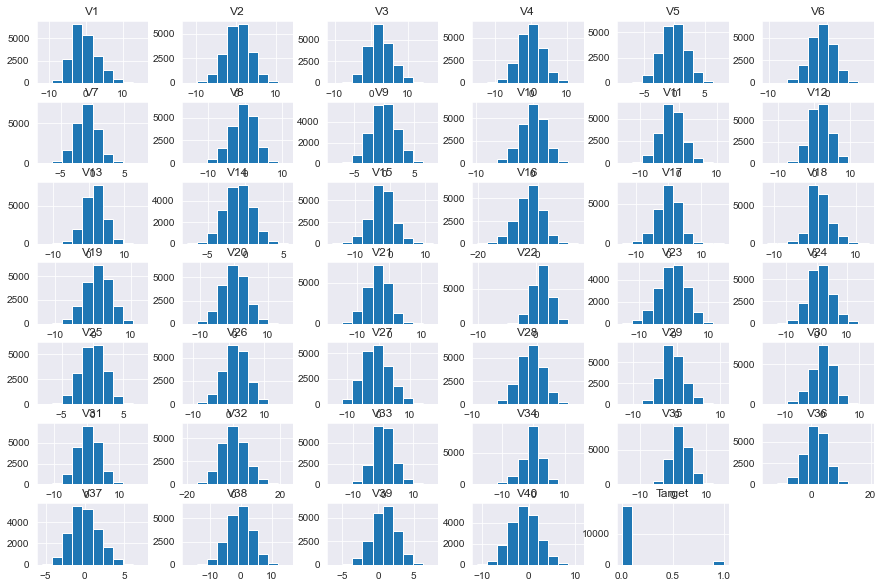

<IPython.core.display.Javascript object>

In [23]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

#### Plotting histograms and boxplots for all the variables

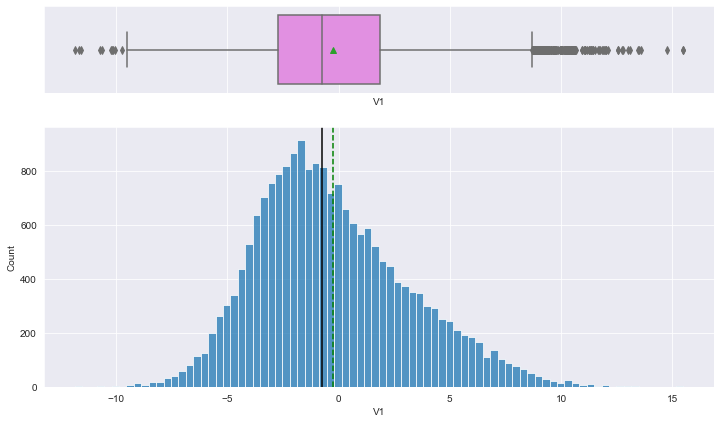

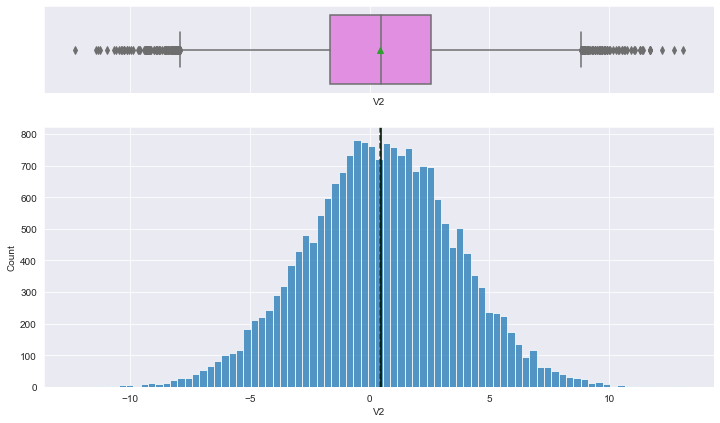

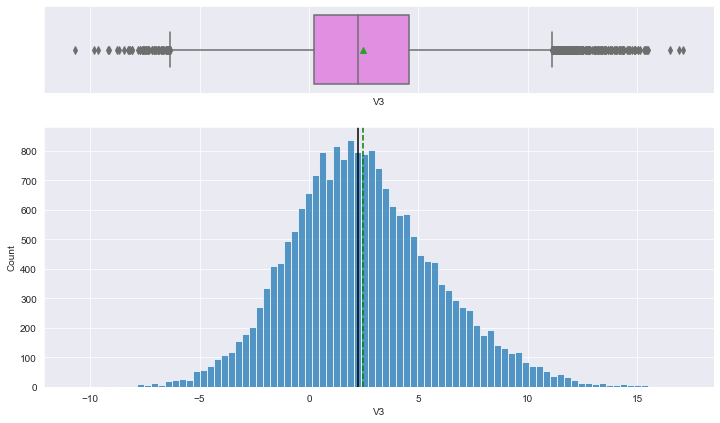

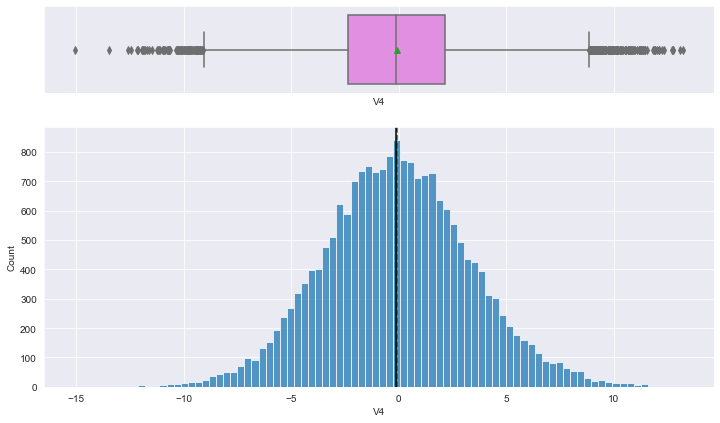

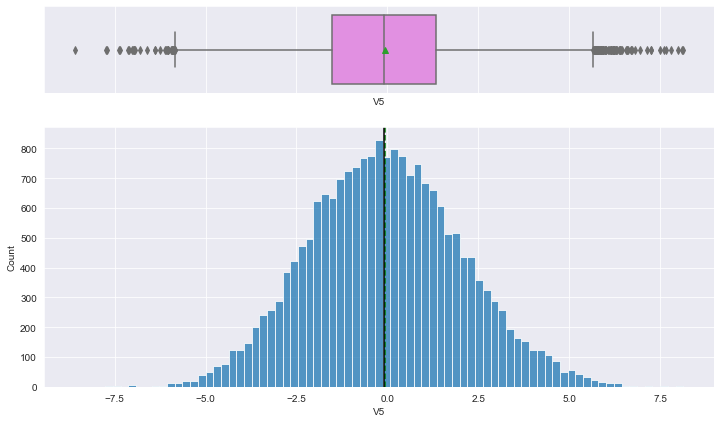

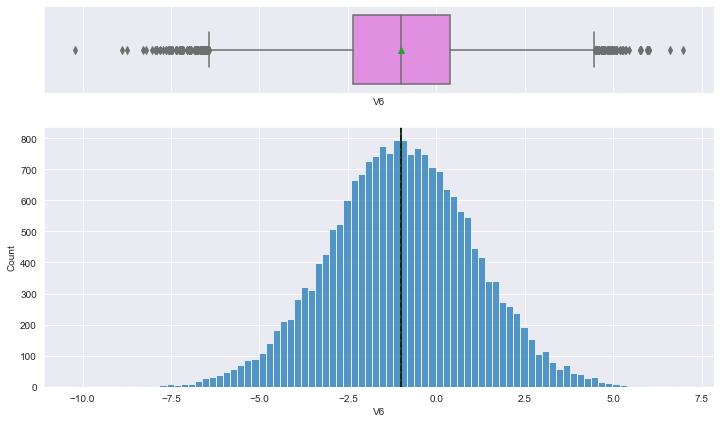

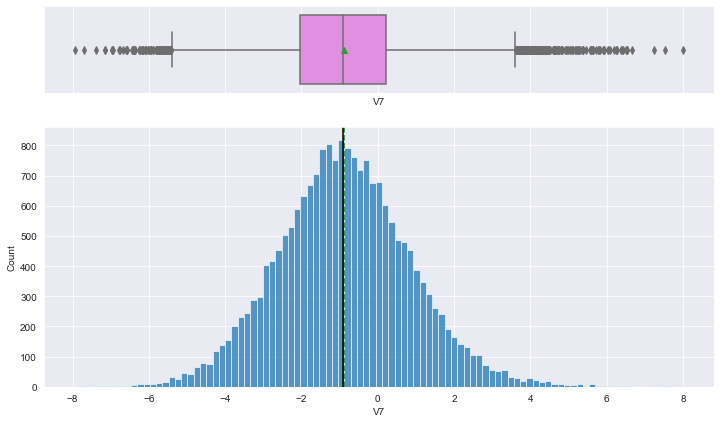

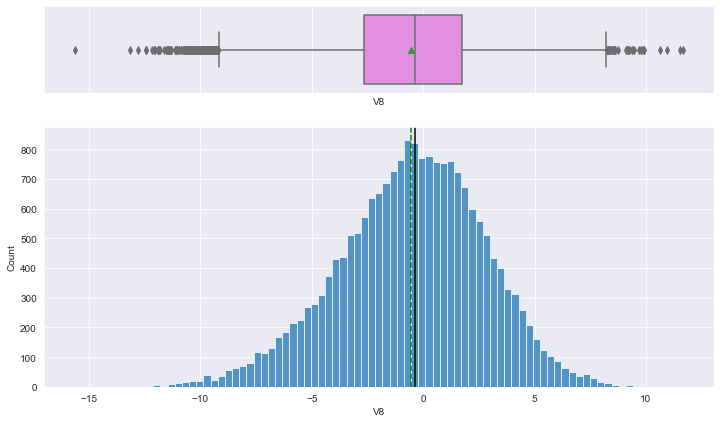

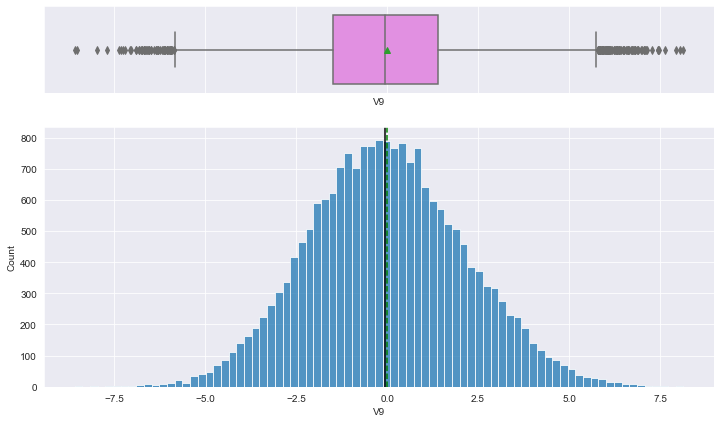

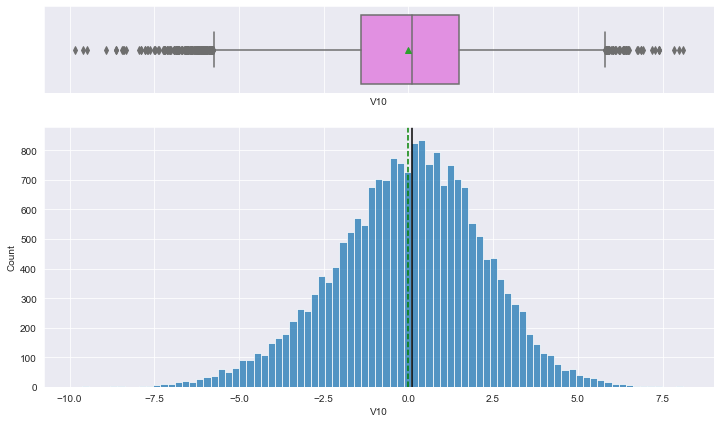

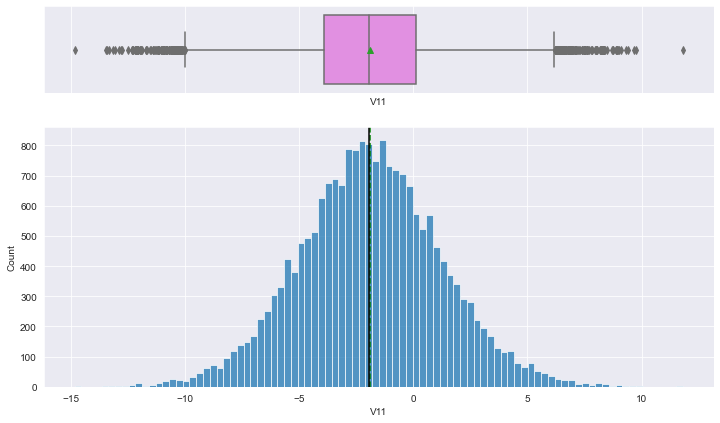

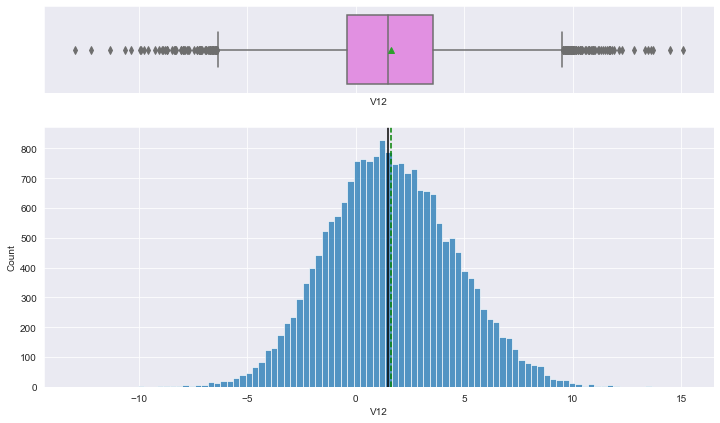

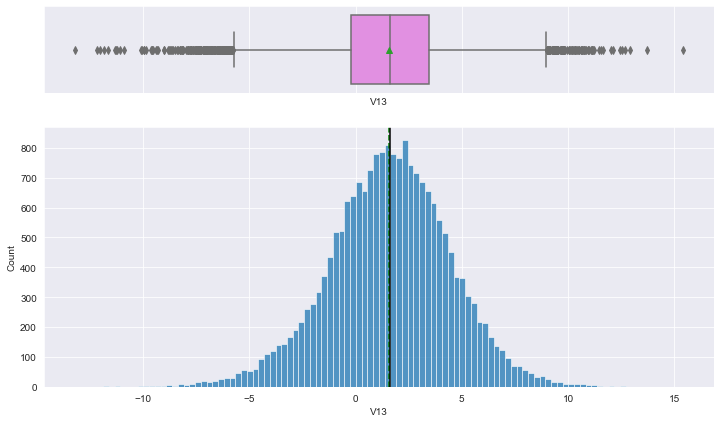

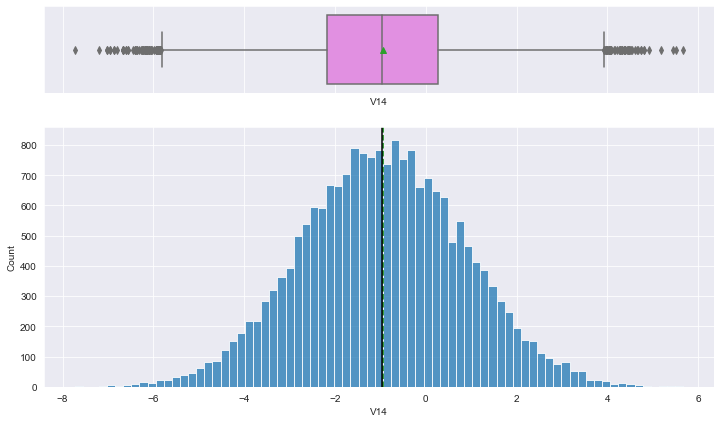

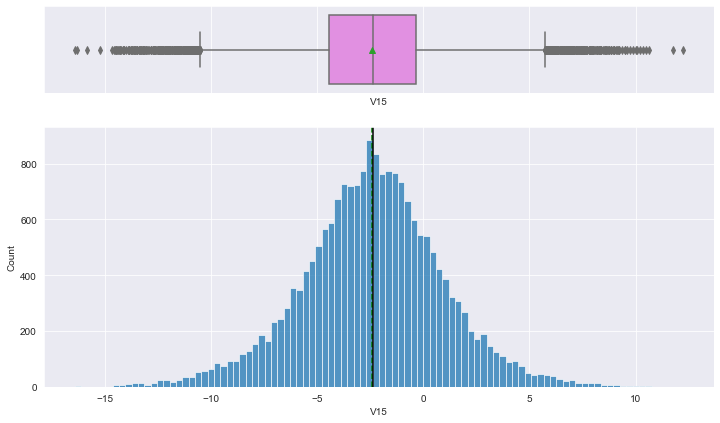

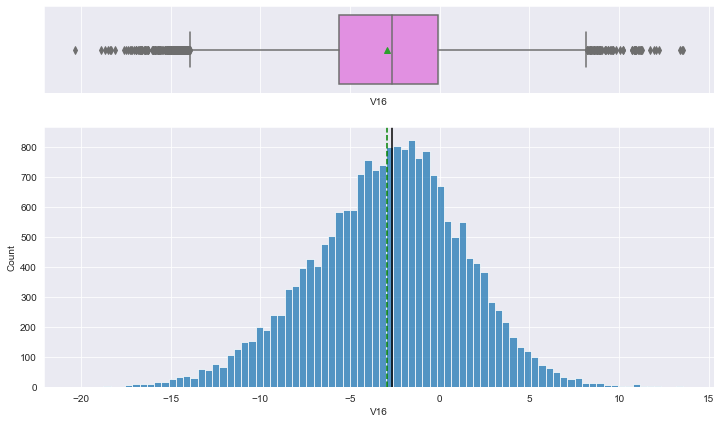

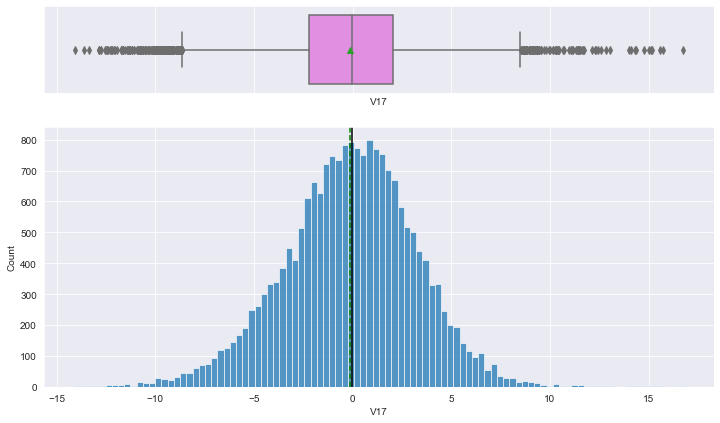

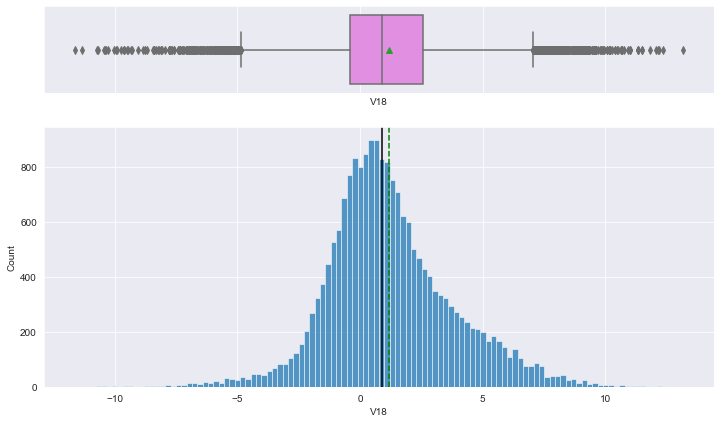

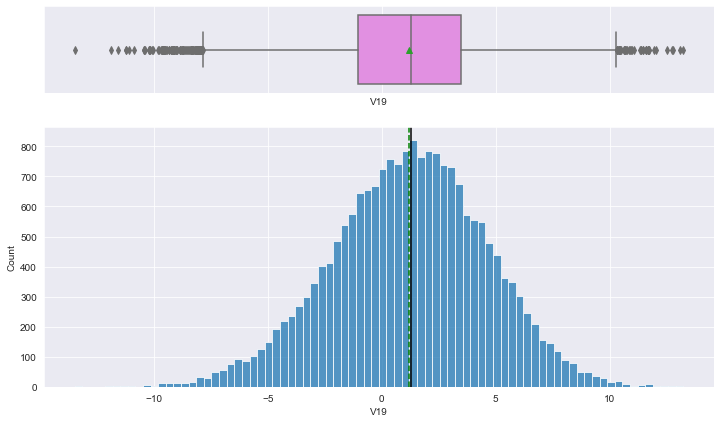

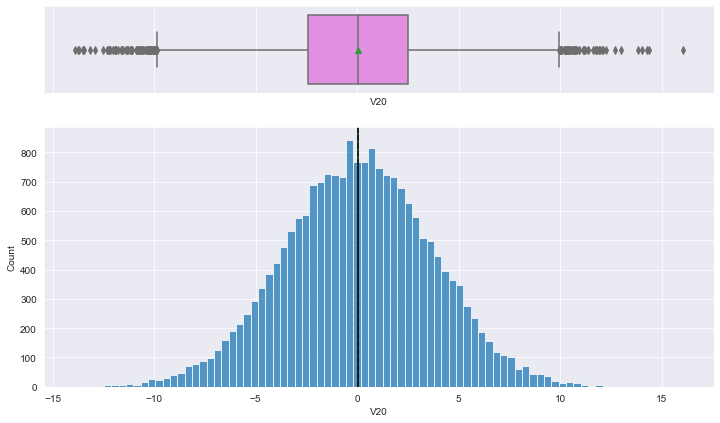

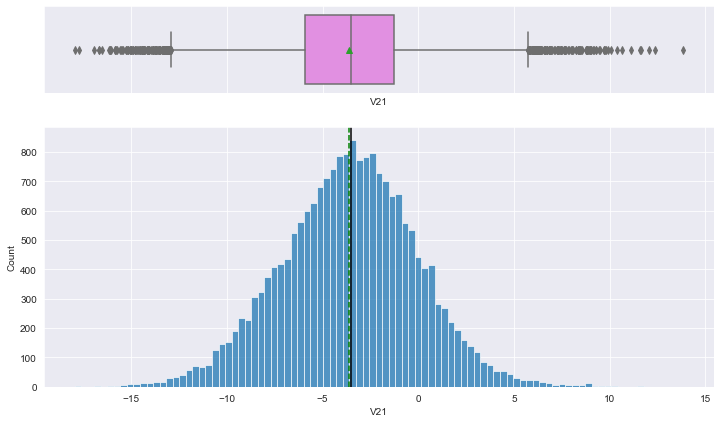

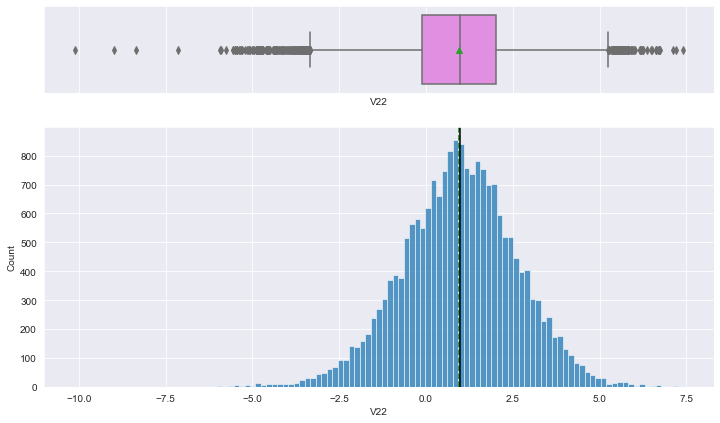

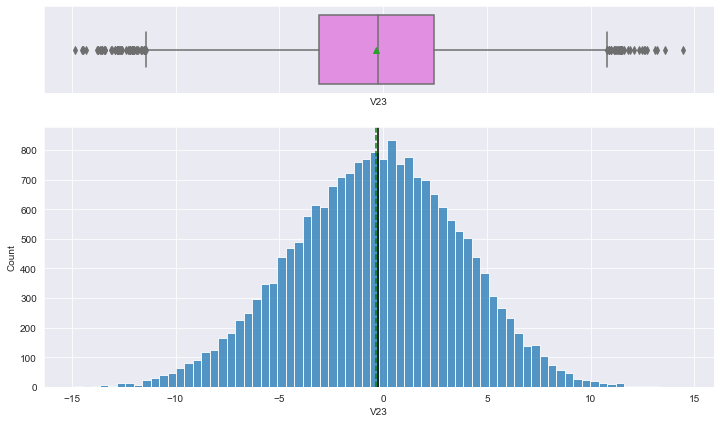

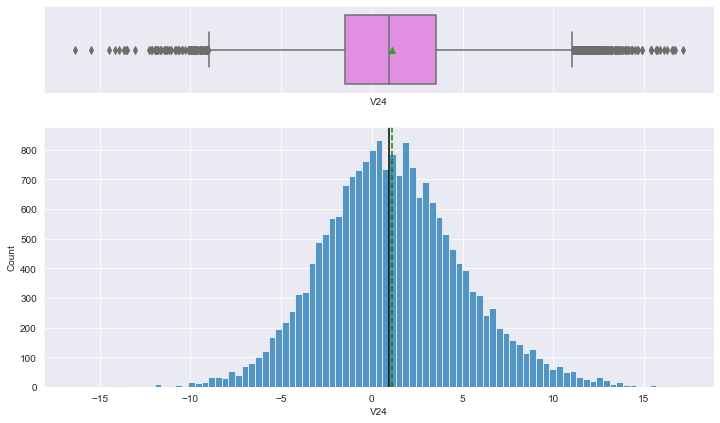

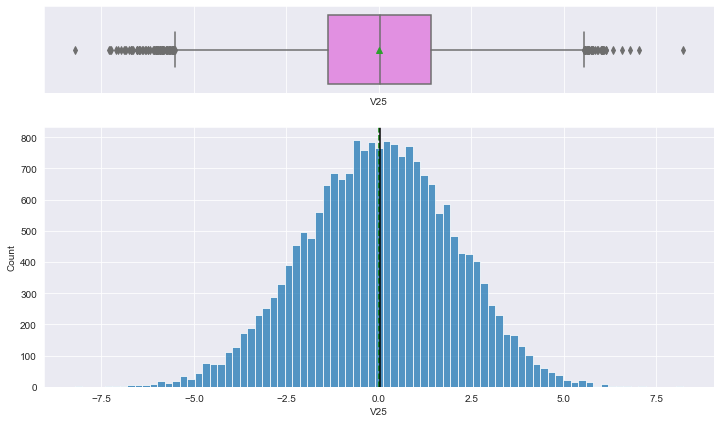

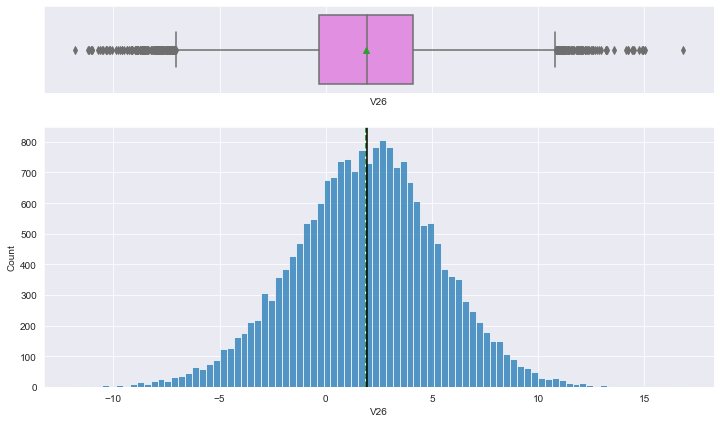

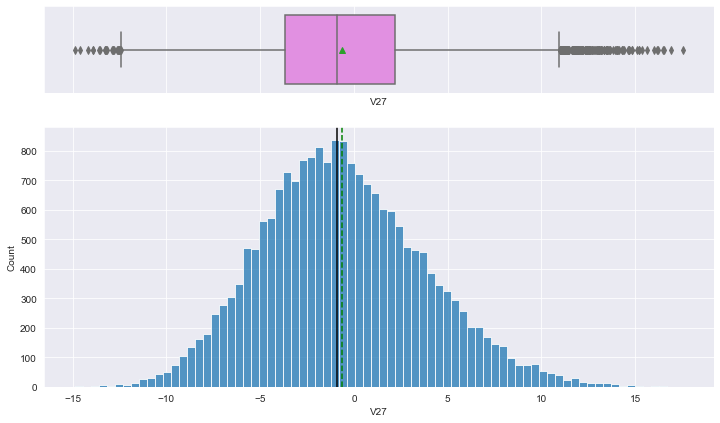

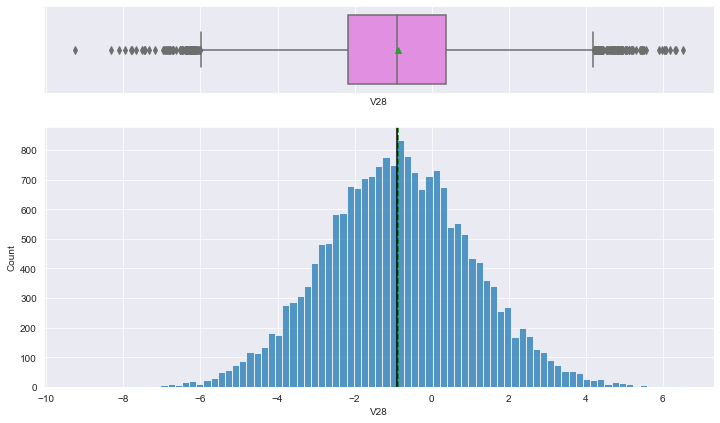

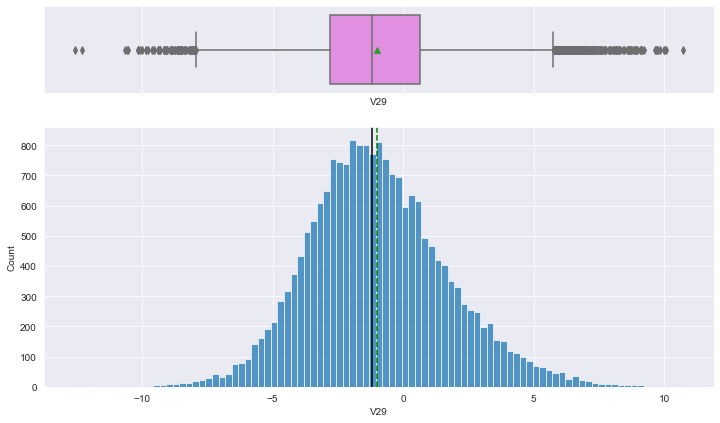

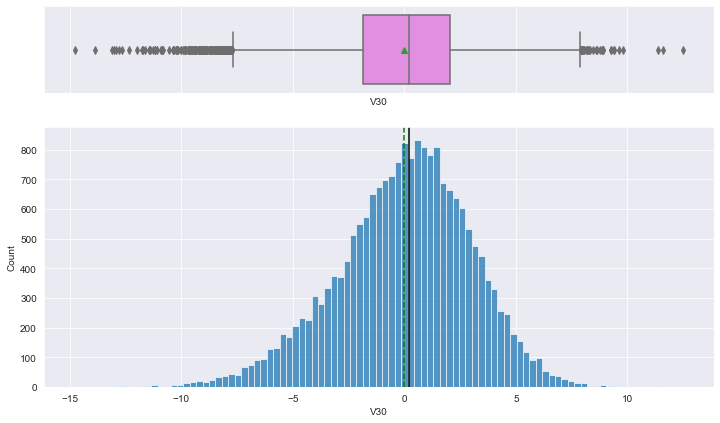

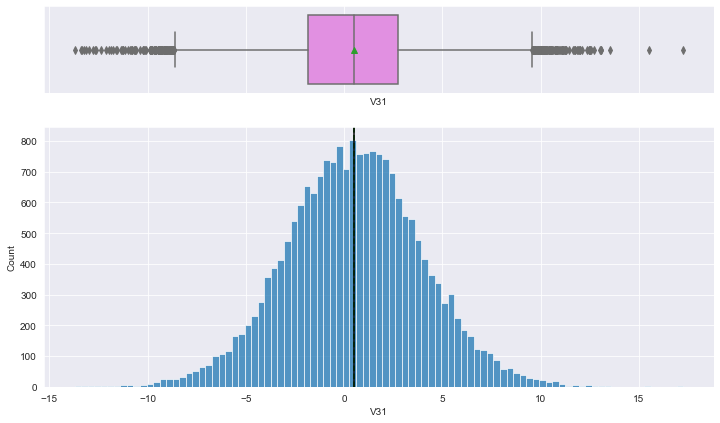

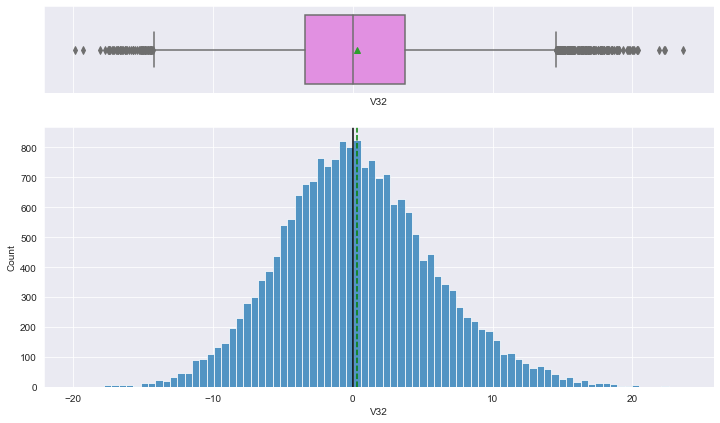

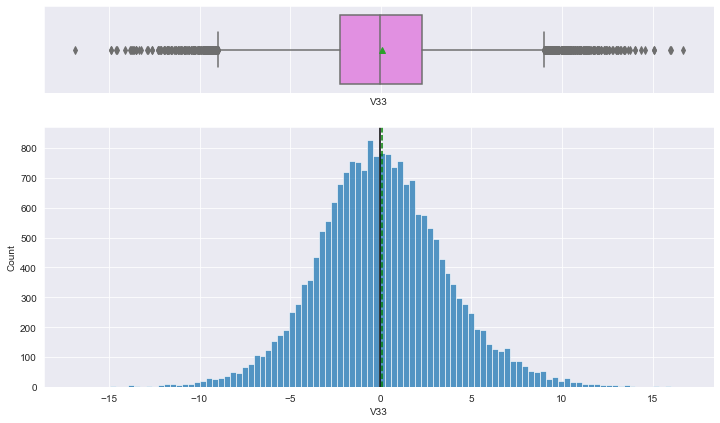

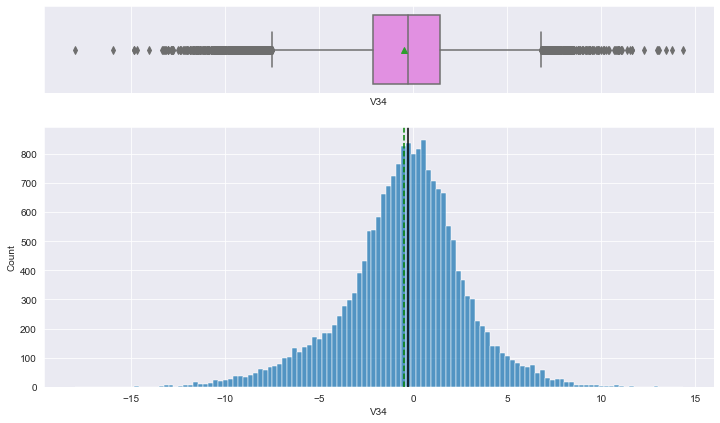

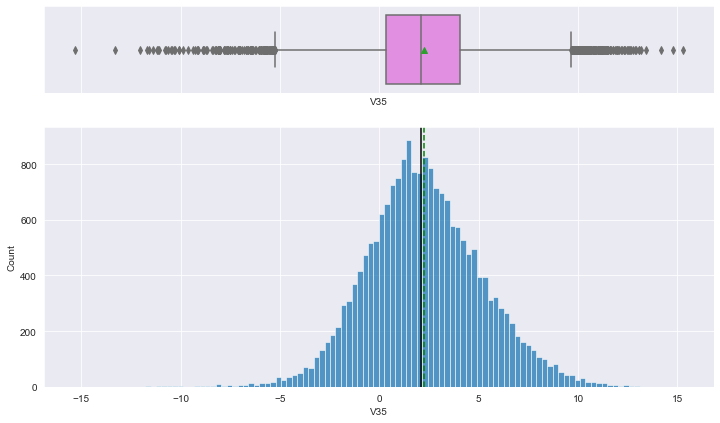

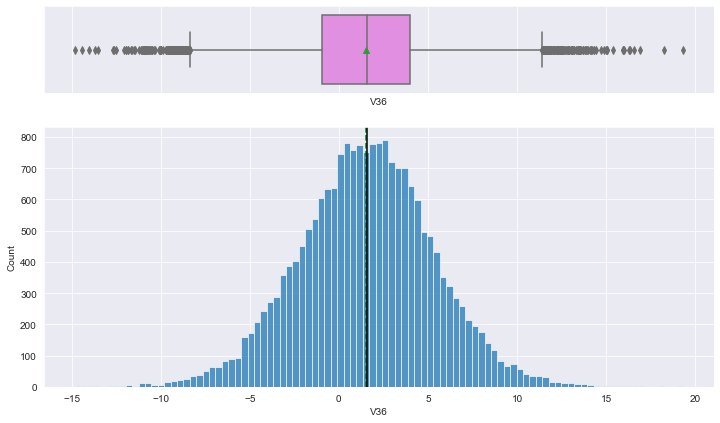

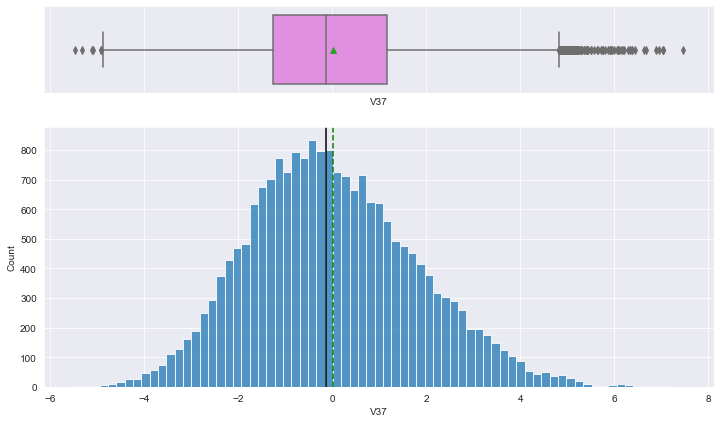

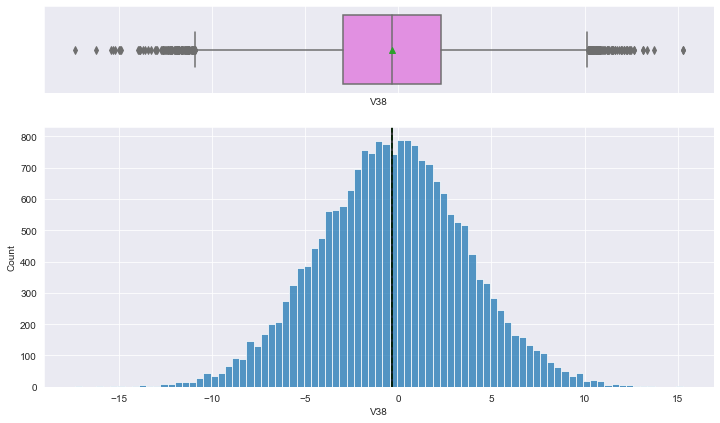

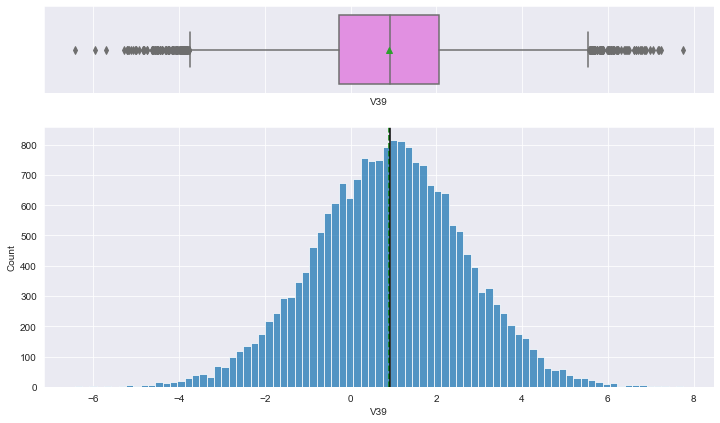

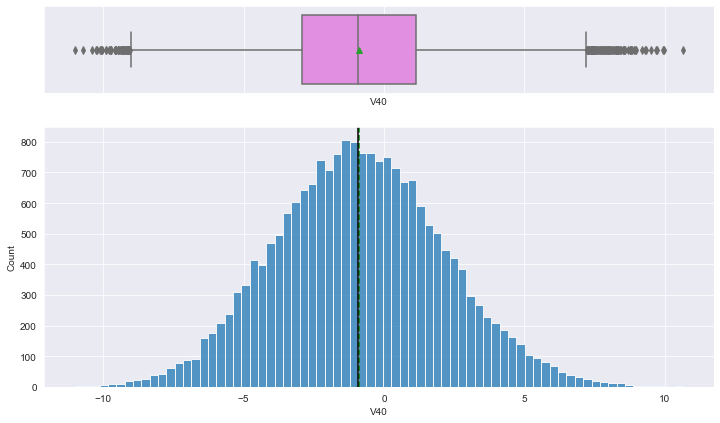

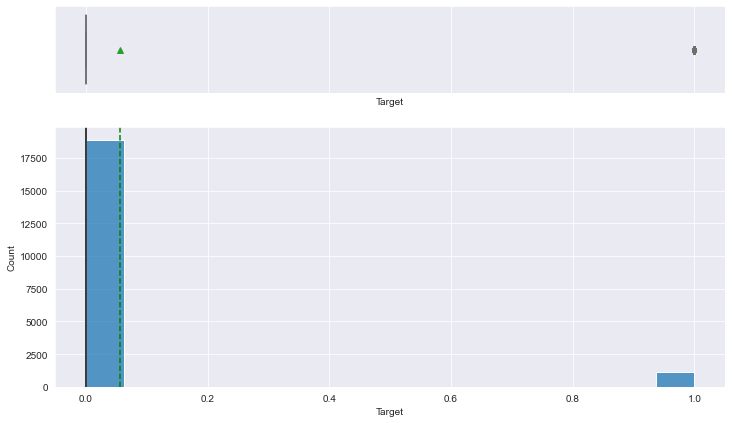

<IPython.core.display.Javascript object>

In [24]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

    All the variables are evenly disrtibuted.

## Data Pre-Processing

**Since the have been separated to training and testing set, diving the training set to training and validation set.**


In [25]:
X = data.drop(["Target"], axis=1)
Y = data["Target"]

X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

print("Shape of Training set : ", X_train.shape)
print("Shape of validation test : ", X_val.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))

Shape of Training set :  (16000, 40)
Shape of validation test :  (4000, 40)
Percentage of classes in training set:
0   0.945
1   0.056
Name: Target, dtype: float64
Percentage of classes in validation set:
0   0.945
1   0.056
Name: Target, dtype: float64


<IPython.core.display.Javascript object>

In [26]:
X_test = data2.drop(["Target"], axis=1)
Y_test = data2["Target"]

<IPython.core.display.Javascript object>

In [27]:
print(X_test.shape)

(5000, 40)


<IPython.core.display.Javascript object>

## Missing value imputation




In [28]:
imputer = SimpleImputer(strategy="median")
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

<IPython.core.display.Javascript object>

In [29]:
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

<IPython.core.display.Javascript object>

## Model Building

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

In [30]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [31]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

In [32]:
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building on original data

In [33]:
%%time 

models = [] 

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  
names = []  


print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.48988129245223133
Bagging: 0.7083222243382213
Random forest: 0.7195899193804354
GBM: 0.7173363803719928
Adaboost: 0.6215641465117756
Xgboost: 0.810804291246112
dtree: 0.7196280073636767

Validation Performance:

Logistic regression: 0.49099099099099097
Bagging: 0.7207207207207207
Random forest: 0.7432432432432432
GBM: 0.7432432432432432
Adaboost: 0.6576576576576577
Xgboost: 0.8153153153153153
dtree: 0.7387387387387387
CPU times: user 4min 24s, sys: 7.56 s, total: 4min 32s
Wall time: 3min 16s


<IPython.core.display.Javascript object>

### Plotting boxplots for CV scores of all models defined above

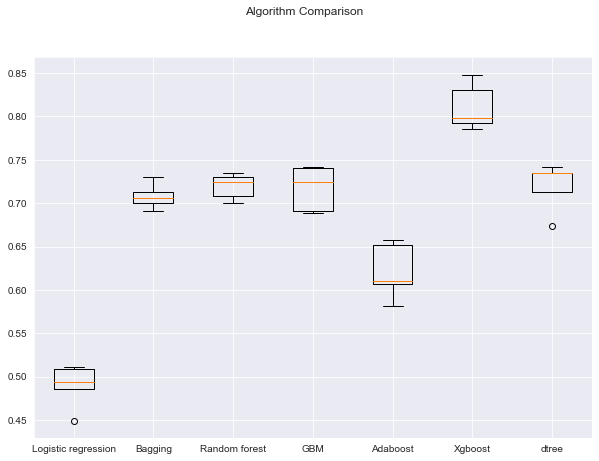

<IPython.core.display.Javascript object>

In [34]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- We can see that Xgboost is giving the highest cross-validated recall followed by Dtree, Randomforest, and GBM.

- We will tune the Xgboost, GMB, and Random-forest models and see if the performance improves.

- Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved

### Model Building with oversampled data

In [35]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 888
Before OverSampling, counts of label '0': 15112 

After OverSampling, counts of label '1': 15112
After OverSampling, counts of label '0': 15112 

After OverSampling, the shape of train_X: (30224, 40)
After OverSampling, the shape of train_y: (30224,) 



<IPython.core.display.Javascript object>

In [36]:
%%time 

models = []  

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  
names = []  

print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.48988129245223133
Bagging: 0.7083222243382213
Random forest: 0.7195899193804354
GBM: 0.7173363803719928
Adaboost: 0.6215641465117756
Xgboost: 0.810804291246112
dtree: 0.7196280073636767

Validation Performance:

Logistic regression: 0.49099099099099097
Bagging: 0.7207207207207207
Random forest: 0.7432432432432432
GBM: 0.7432432432432432
Adaboost: 0.6576576576576577
Xgboost: 0.8153153153153153
dtree: 0.7387387387387387
CPU times: user 4min 25s, sys: 8.18 s, total: 4min 33s
Wall time: 3min 14s


<IPython.core.display.Javascript object>

### Plotting boxplots for CV scores of all over sampled data

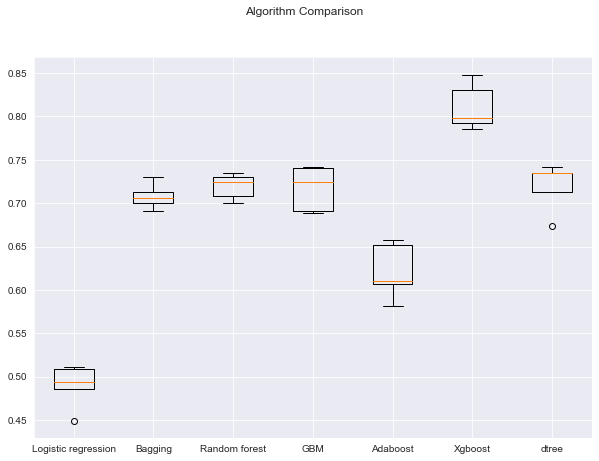

<IPython.core.display.Javascript object>

In [37]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with undersampled data

In [38]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_under == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_under.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before UnderSampling, counts of label '1': 888
Before UnderSampling, counts of label '0': 15112 

After UnderSampling, counts of label '1': 888
After UnderSampling, counts of label '0': 888 

After UnderSampling, the shape of train_X: (1776, 40)
After UnderSampling, the shape of train_y: (1776,) 



<IPython.core.display.Javascript object>

In [39]:
%%time 

models = []  

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.48988129245223133
Bagging: 0.7083222243382213
Random forest: 0.7195899193804354
GBM: 0.7173363803719928
Adaboost: 0.6215641465117756
Xgboost: 0.810804291246112
dtree: 0.7196280073636767

Validation Performance:

Logistic regression: 0.49099099099099097
Bagging: 0.7207207207207207
Random forest: 0.7432432432432432
GBM: 0.7432432432432432
Adaboost: 0.6576576576576577
Xgboost: 0.8153153153153153
dtree: 0.7387387387387387
CPU times: user 4min 25s, sys: 7.98 s, total: 4min 33s
Wall time: 3min 14s


<IPython.core.display.Javascript object>

### Plotting boxplots for CV scores of all undersampled data

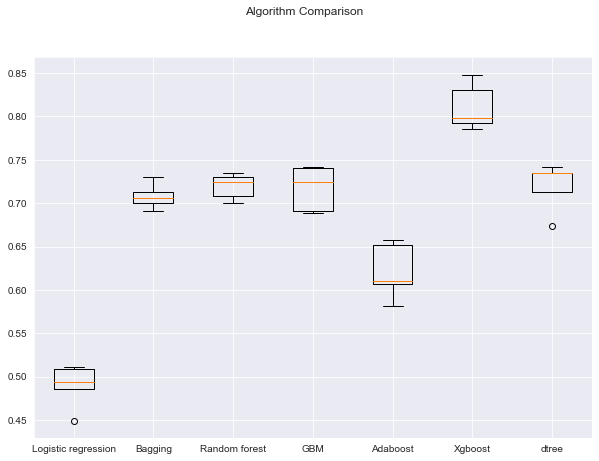

<IPython.core.display.Javascript object>

In [40]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

## Hyperparameter Tuning

## Decision-tree

### Tuning decision-tree using oversampled data

In [41]:
%%time 

# defining model
model = DecisionTreeClassifier(random_state=1)


# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1,2,3, 4, 7],
    "max_leaf_nodes": [10, 15,20],
    "min_impurity_decrease": [0.0001, 0.001],
}



#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 20, 'max_depth': 3} with CV score=0.9143060712783726:
CPU times: user 1.89 s, sys: 2.61 s, total: 4.5 s
Wall time: 21.5 s


<IPython.core.display.Javascript object>

In [42]:
# building model with best parameters
dt_over = DecisionTreeClassifier(
    max_depth=5, min_samples_leaf=4, max_leaf_nodes=15, min_impurity_decrease=0.0001,
)

# Fit the model on training data
dt_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=4)

<IPython.core.display.Javascript object>

In [43]:
## To check the performance on training set
dt_train_performance_over = model_performance_classification_sklearn(
    dt_over, X_train_over, y_train_over
)

print("Training performance on oversample decision-tree model:")
dt_train_performance_over

Training performance on oversample decision-tree model:


,Accuracy,Recall,Precision,F1
0,0.897,0.893,0.901,0.897


<IPython.core.display.Javascript object>

confusion matrix training performance on oversampled decision-tree model:


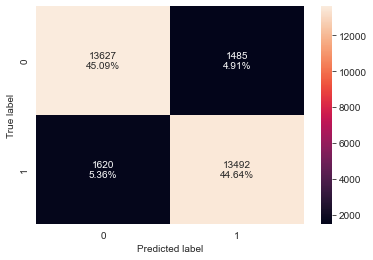

<IPython.core.display.Javascript object>

In [44]:
print("confusion matrix training performance on oversampled decision-tree model:")
confusion_matrix_sklearn(dt_over, X_train_over, y_train_over)

In [45]:
## To check the performance on validation set
dt_val_performance_over = model_performance_classification_sklearn(
    dt_over, X_val, y_val
)

print("validation performance on oversample decision-tree model:")
dt_val_performance_over

validation performance on oversample decision-tree model:


,Accuracy,Recall,Precision,F1
0,0.892,0.860,0.322,0.469


<IPython.core.display.Javascript object>

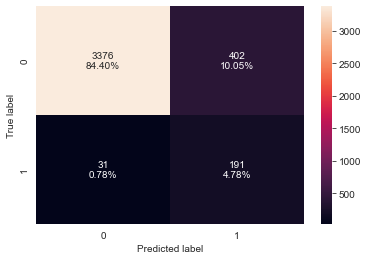

<IPython.core.display.Javascript object>

In [46]:
confusion_matrix_sklearn(dt_over, X_val, y_val)

### Decision-tree model Building with undersampled data

In [47]:
%%time 

# defining model
model = DecisionTreeClassifier(random_state=1)


# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1,2,3, 4, 7],
    "max_leaf_nodes": [10, 15,20],
    "min_impurity_decrease": [0.0001, 0.001],
}



#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.8581857423982733:
CPU times: user 337 ms, sys: 38.9 ms, total: 375 ms
Wall time: 1.2 s


<IPython.core.display.Javascript object>

In [48]:
# building model with best parameters
dt_under = DecisionTreeClassifier(
    max_depth=5, min_samples_leaf=4, max_leaf_nodes=15, min_impurity_decrease=0.0001,
)

# Fit the model on training data
dt_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=4)

<IPython.core.display.Javascript object>

In [49]:
## To check the performance on training set
dt_train_performance_under = model_performance_classification_sklearn(
    dt_under, X_train_under, y_train_under
)

print("Training performance on undersample decision-tree model:")
dt_train_performance_under

Training performance on undersample decision-tree model:


,Accuracy,Recall,Precision,F1
0,0.910,0.877,0.939,0.907


<IPython.core.display.Javascript object>

confusion matrix training performance on oversampled decision-tree model:


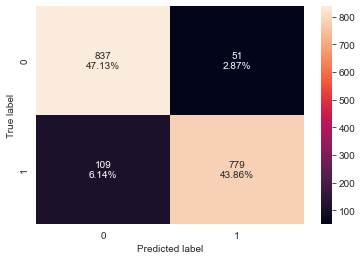

<IPython.core.display.Javascript object>

In [50]:
print("confusion matrix training performance on oversampled decision-tree model:")
confusion_matrix_sklearn(dt_under, X_train_under, y_train_under)

In [51]:
## To check the performance on validation set
dt_val_performance_under = model_performance_classification_sklearn(
    dt_under, X_val, y_val
)

print("validation performance on underrsample decision-tree model:")
dt_val_performance_under

validation performance on underrsample decision-tree model:


,Accuracy,Recall,Precision,F1
0,0.894,0.838,0.325,0.468


<IPython.core.display.Javascript object>

- The tuned dtree model is  overfitting the training data
- The validation precision is still less than 50% on bothe the validation set of the undersample and over sample data i.e. the model is not good at identifying potential default.

## Adaboost model

### Tuning AdaBoost using oversampled data

In [52]:
%%time 

model = AdaBoostClassifier(random_state=1)


param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

scorer = metrics.make_scorer(metrics.recall_score)

randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9757806956724673:
CPU times: user 24.9 s, sys: 278 ms, total: 25.2 s
Wall time: 8min 33s


<IPython.core.display.Javascript object>

In [53]:
adb_tuned_over = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

<IPython.core.display.Javascript object>

In [54]:
## To check the performance on training set
adb_train_performance_over = model_performance_classification_sklearn(
    adb_tuned_over, X_train_over, y_train_over
)

print("Training performance on oversample adaboost model:")
adb_train_performance_over

Training performance on oversample adaboost model:


,Accuracy,Recall,Precision,F1
0,0.993,0.992,0.994,0.993


<IPython.core.display.Javascript object>

confusion matrix training performance on oversampled adaboost model:


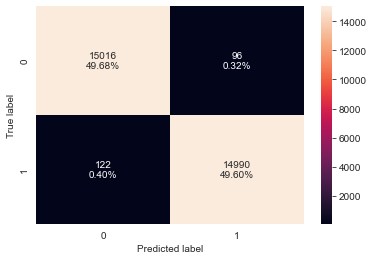

<IPython.core.display.Javascript object>

In [55]:
print("confusion matrix training performance on oversampled adaboost model:")
confusion_matrix_sklearn(adb_tuned_over, X_train_over, y_train_over)

In [56]:
## To check the performance on validation set
adb_val_performance_over = model_performance_classification_sklearn(
    adb_tuned_over, X_val, y_val
)

print("validation performance on oversample adaboost model:")
adb_val_performance_over

validation performance on oversample adaboost model:


,Accuracy,Recall,Precision,F1
0,0.975,0.851,0.733,0.787


<IPython.core.display.Javascript object>

confusion matrix validation performance on oversampled adaboost model:


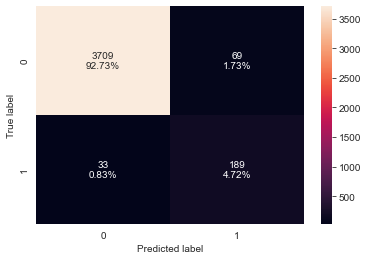

<IPython.core.display.Javascript object>

In [57]:
print("confusion matrix validation performance on oversampled adaboost model:")
confusion_matrix_sklearn(adb_tuned_over, X_val, y_val)

### Adaboost model Building with undersampled data

In [58]:
%%time 

model = AdaBoostClassifier(random_state=1)


param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

scorer = metrics.make_scorer(metrics.recall_score)

randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9757806956724673:
CPU times: user 24.9 s, sys: 218 ms, total: 25.1 s
Wall time: 8min 39s


<IPython.core.display.Javascript object>

In [59]:
adb_tuned_under = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned_under.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

<IPython.core.display.Javascript object>

In [60]:
## To check the performance on training set
adb_train_performance_under = model_performance_classification_sklearn(
    adb_tuned_under, X_train_under, y_train_under
)

print("Training performance on undersample adaboost model:")
adb_train_performance_under

Training performance on undersample adaboost model:


,Accuracy,Recall,Precision,F1
0,0.991,0.990,0.992,0.991


<IPython.core.display.Javascript object>

confusion matrix training performance on undersampled adaboost model:


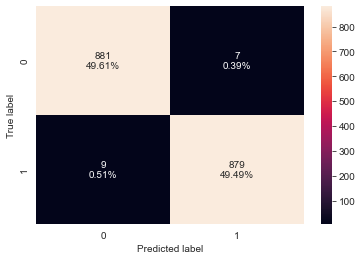

<IPython.core.display.Javascript object>

In [61]:
print("confusion matrix training performance on undersampled adaboost model:")
confusion_matrix_sklearn(adb_tuned_under, X_train_under, y_train_under)

In [62]:
## To check the performance on validation set
adb_val_performance_under = model_performance_classification_sklearn(
    adb_tuned_under, X_val, y_val
)

print("Validation performance on undersample adaboost model:")
adb_val_performance_under

Validation performance on undersample adaboost model:


,Accuracy,Recall,Precision,F1
0,0.975,0.851,0.733,0.787


<IPython.core.display.Javascript object>

confusion matrix validation performance on undersampled adaboost model:


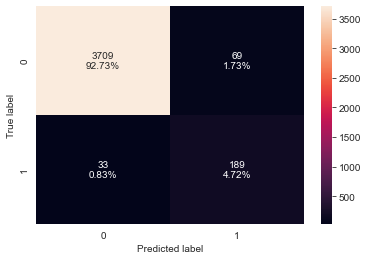

<IPython.core.display.Javascript object>

In [63]:
print("confusion matrix validation performance on undersampled adaboost model:")
confusion_matrix_sklearn(adb_tuned_under, X_val, y_val)

- The tuned adaboost model is overfitting the training data. However, it is a better model than decision tree.

## Gradient-boost model

### Tuning Gradient Boosting using oversampled data

In [64]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(50,150,25), "learning_rate": [0.2,0.01, 0.05, 1], "subsample":[0.3,0.4,0.5,0.7,0.6], "max_features":[0.3,0.4,0.5,0.6,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7580206944708945:
CPU times: user 7.88 s, sys: 147 ms, total: 8.03 s
Wall time: 2min 15s


<IPython.core.display.Javascript object>

In [65]:
gbm_tuned_over = GradientBoostingClassifier(
    max_features=0.7, random_state=1, learning_rate=1, n_estimators=75, subsample=0.3
)

gbm_tuned_over.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=75,
                           random_state=1, subsample=0.3)

<IPython.core.display.Javascript object>

In [66]:
## To check the performance on training set
gbm_train_performance_over = model_performance_classification_sklearn(
    gbm_tuned_over, X_train_over, y_train_over
)

print("Training performance on oversample gradient-boost model:")
gbm_train_performance_over

Training performance on oversample gradient-boost model:


,Accuracy,Recall,Precision,F1
0,0.822,0.652,0.988,0.785


<IPython.core.display.Javascript object>

confusion matrix validation performance on undersampled gradient-boost model:


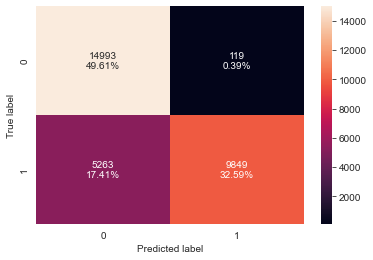

<IPython.core.display.Javascript object>

In [67]:
print("confusion matrix validation performance on undersampled gradient-boost model:")
confusion_matrix_sklearn(gbm_tuned_over, X_train_over, y_train_over)

In [68]:
# To check the performance on validation set
gbm_train_performance_over = model_performance_classification_sklearn(
    gbm_tuned_over, X_val, y_val
)

print("Training performance on validation set:")
gbm_train_performance_over

Training performance on validation set:


,Accuracy,Recall,Precision,F1
0,0.966,0.599,0.739,0.662


<IPython.core.display.Javascript object>

confusion matrix validation performance on oversampled gbm model:


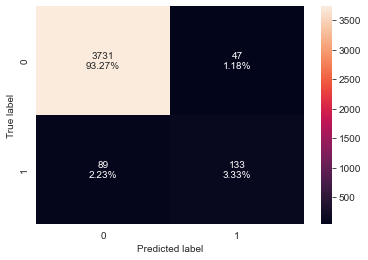

<IPython.core.display.Javascript object>

In [69]:
print("confusion matrix validation performance on oversampled gbm model:")
confusion_matrix_sklearn(gbm_tuned_over, X_val, y_val)

### Tuning Gradient Boosting using undersampled data

In [70]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(50,150,25), "learning_rate": [0.2,0.01, 0.05, 1], "subsample":[0.3,0.4,0.5,0.7,0.6], "max_features":[0.3,0.4,0.5,0.6,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7580206944708945:
CPU times: user 7.84 s, sys: 148 ms, total: 7.99 s
Wall time: 2min 15s


<IPython.core.display.Javascript object>

In [71]:
gbm_tuned_under = GradientBoostingClassifier(
    max_features=0.7, random_state=1, learning_rate=1, n_estimators=75, subsample=0.3
)

gbm_tuned_under.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=75,
                           random_state=1, subsample=0.3)

<IPython.core.display.Javascript object>

In [72]:
## To check the performance on training set
gbm_train_performance_under = model_performance_classification_sklearn(
    gbm_tuned_under, X_train_under, y_train_under
)

print("Training performance on undersample gradient-boost model:")
gbm_train_performance_under

Training performance on undersample gradient-boost model:


,Accuracy,Recall,Precision,F1
0,0.836,0.685,0.982,0.807


<IPython.core.display.Javascript object>

confusion matrix on training performance on undersampled gbm-model:


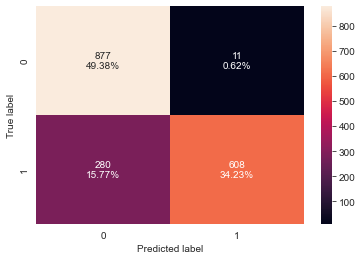

<IPython.core.display.Javascript object>

In [73]:
print("confusion matrix on training performance on undersampled gbm-model:")
confusion_matrix_sklearn(gbm_tuned_under, X_train_under, y_train_under)

In [74]:
# To check the performance on validation set
gbm_val_performance_under = model_performance_classification_sklearn(
    gbm_tuned_under, X_val, y_val
)

print("Training performance on validation set:")
gbm_val_performance_under

Training performance on validation set:


,Accuracy,Recall,Precision,F1
0,0.966,0.599,0.739,0.662


<IPython.core.display.Javascript object>

confusion matrix validation performance on undersampled gradient-boost model:


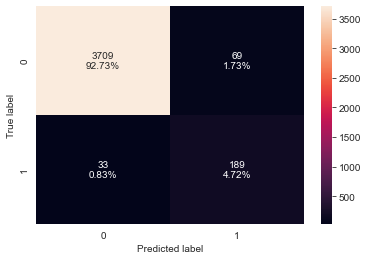

<IPython.core.display.Javascript object>

In [75]:
print("confusion matrix validation performance on undersampled gradient-boost model:")
confusion_matrix_sklearn(adb_tuned_under, X_val, y_val)

## XGBoost

### Tuning XGBoost using oversampled data

In [76]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8558941154065891:
CPU times: user 40.8 s, sys: 2.53 s, total: 43.3 s
Wall time: 11min 9s


<IPython.core.display.Javascript object>

In [77]:
xgb_tuned_over = XGBClassifier(
    max_features=0.7, random_state=1, learning_rate=1, n_estimators=75, subsample=0.3
)

xgb_tuned_over.fit(X_train, y_train)

[21:59:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_features=0.7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, ...)

<IPython.core.display.Javascript object>

In [78]:
## To check the performance on training set
xgb_train_performance_over = model_performance_classification_sklearn(
    xgb_tuned_over, X_train_over, y_train_over
)

print("Training performance on oversample xgboost model:")
xgb_train_performance_over

Training performance on oversample xgboost model:


,Accuracy,Recall,Precision,F1
0,0.931,0.864,0.997,0.926


<IPython.core.display.Javascript object>

confusion matrix validation performance on oversampled xgb-model:


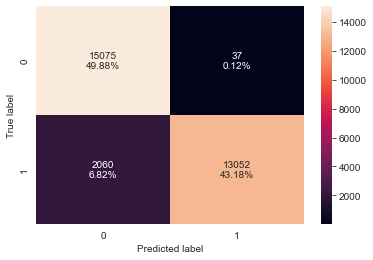

<IPython.core.display.Javascript object>

In [79]:
print("confusion matrix validation performance on oversampled xgb-model:")
confusion_matrix_sklearn(xgb_tuned_over, X_train_over, y_train_over)

In [80]:
# To check ther performance on validation set
xgb_val_performance_over = model_performance_classification_sklearn(
    xgb_tuned_over, X_val, y_val
)

print("training performance on validation set:")
xgb_val_performance_over

training performance on validation set:


,Accuracy,Recall,Precision,F1
0,0.977,0.775,0.800,0.787


<IPython.core.display.Javascript object>

confusion matrix validation performance on overersampled xgb-model:


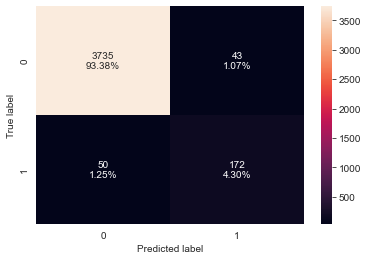

<IPython.core.display.Javascript object>

In [81]:
print("confusion matrix validation performance on overersampled xgb-model:")
confusion_matrix_sklearn(xgb_tuned_over, X_val, y_val)

### Tuning XGBoost using undersampled data

In [82]:
xgb_tuned_under = XGBClassifier(
    max_features=0.7, random_state=1, learning_rate=1, n_estimators=75, subsample=0.3
)

xgb_tuned_under.fit(X_train, y_train)

[22:00:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_features=0.7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, ...)

<IPython.core.display.Javascript object>

In [83]:
## To check the performance on training set
xgb_train_performance_under = model_performance_classification_sklearn(
    xgb_tuned_under, X_train_under, y_train_under
)

print("Training performance on oversample xgboost model:")
xgb_train_performance_under

Training performance on oversample xgboost model:


,Accuracy,Recall,Precision,F1
0,0.976,0.956,0.996,0.976


<IPython.core.display.Javascript object>

confusion matrix on training performance on undersampled xgboost:


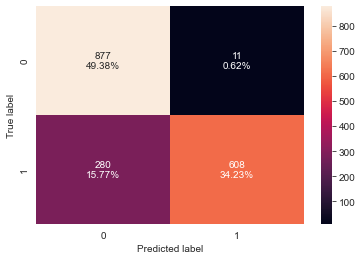

<IPython.core.display.Javascript object>

In [84]:
print("confusion matrix on training performance on undersampled xgboost:")
confusion_matrix_sklearn(gbm_tuned_under, X_train_under, y_train_under)

In [85]:
# To check the performance on validation set
xgb_val_performance_under = model_performance_classification_sklearn(
    xgb_tuned_under, X_val, y_val
)

print("Training performance on validation set:")
xgb_val_performance_under

Training performance on validation set:


,Accuracy,Recall,Precision,F1
0,0.977,0.775,0.800,0.787


<IPython.core.display.Javascript object>

confusion matrix validation performance on undersampled xgboost model:


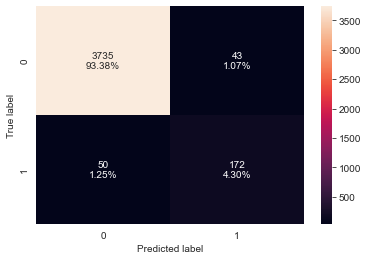

<IPython.core.display.Javascript object>

In [86]:
print("confusion matrix validation performance on undersampled xgboost model:")
confusion_matrix_sklearn(xgb_tuned_under, X_val, y_val)

## Random-forest

### Tuning Random-forest using oversampled data

In [87]:
%%time 

# defining model
Model =RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:426: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.max_features == "auto":
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:179: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if getattr(estimator, "max_features", None) == "auto":
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:426: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.max_features == "auto":
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:179: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if getattr(estimator, "max_features", None) == "auto":
/opt/anaconda3

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7038786262934045:
CPU times: user 19.2 s, sys: 328 ms, total: 19.5 s
Wall time: 4min 7s


<IPython.core.display.Javascript object>

In [88]:
rf_tuned_over = RandomForestClassifier(
    random_state=1, max_samples=0.6, n_estimators=300, min_samples_leaf=1,
)

rf_tuned_over.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

In [89]:
## To check the performance on training set
rf_train_performance_over = model_performance_classification_sklearn(
    rf_tuned_over, X_train_over, y_train_over
)

print("Training performance on oversample random-forest model:")
rf_train_performance_over

Training performance on oversample random-forest model:


,Accuracy,Recall,Precision,F1
0,0.904,0.808,1.000,0.894


<IPython.core.display.Javascript object>

confusion matrix validation performance on oversampled random-forest:


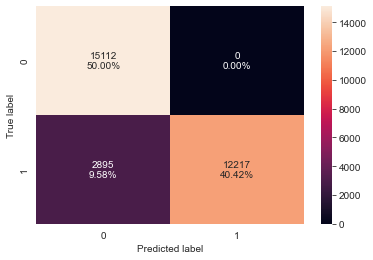

<IPython.core.display.Javascript object>

In [90]:
print("confusion matrix validation performance on oversampled random-forest:")
confusion_matrix_sklearn(rf_tuned_over, X_train_over, y_train_over)

In [91]:
# To check ther performance on validation set
rf_val_performance_over = model_performance_classification_sklearn(
    rf_tuned_over, X_val, y_val
)

print("training performance on validation set:")
rf_val_performance_over

training performance on validation set:


,Accuracy,Recall,Precision,F1
0,0.984,0.730,0.982,0.837


<IPython.core.display.Javascript object>

confusion matrix validation performance on overersampled random-forest:


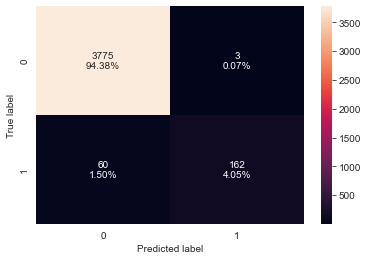

<IPython.core.display.Javascript object>

In [92]:
print("confusion matrix validation performance on overersampled random-forest:")
confusion_matrix_sklearn(rf_tuned_over, X_val, y_val)

### Tuning random-forest using undersampled data

In [93]:
rf_tuned_under = RandomForestClassifier(
    random_state=1, max_samples=0.6, n_estimators=300, min_samples_leaf=1,
)

rf_tuned_under.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

In [94]:
## To check the performance on training set
rf_train_performance_under = model_performance_classification_sklearn(
    rf_tuned_under, X_train_under, y_train_under
)

print("Training performance on undersample random-forest model:")
rf_train_performance_under

Training performance on undersample random-forest model:


,Accuracy,Recall,Precision,F1
0,0.957,0.913,1.000,0.955


<IPython.core.display.Javascript object>

confusion matrix on training performance on undersampled random-forest:


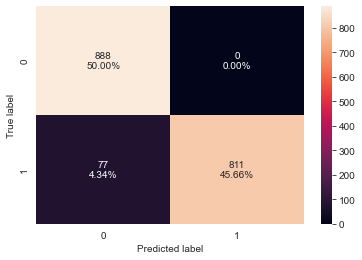

<IPython.core.display.Javascript object>

In [95]:
print("confusion matrix on training performance on undersampled random-forest:")
confusion_matrix_sklearn(rf_tuned_under, X_train_under, y_train_under)

In [96]:
# To check the performance on validation set
rf_val_performance_under = model_performance_classification_sklearn(
    rf_tuned_under, X_val, y_val
)

print("Training performance on validation set:")
rf_val_performance_under

Training performance on validation set:


,Accuracy,Recall,Precision,F1
0,0.984,0.730,0.982,0.837


<IPython.core.display.Javascript object>

confusion matrix validation performance on undersampled random-forest:


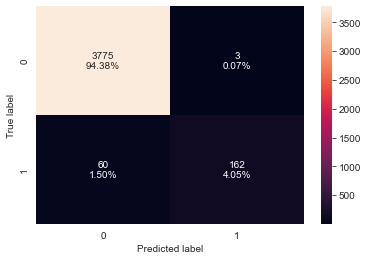

<IPython.core.display.Javascript object>

In [97]:
print("confusion matrix validation performance on undersampled random-forest:")
confusion_matrix_sklearn(rf_tuned_under, X_val, y_val)

**After tuning all the models, next step is to compare the performance of all tuned models and see which one is the best.**

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dt_train_performance_under.T,
        adb_train_performance_over.T,
        gbm_train_performance_under.T,
        xgb_train_performance_under.T,
        rf_train_performance_under.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision tree tuned with undersampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Gradientboost with undersampled data",
    "XGBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision tree tuned with undersampled data,AdaBoost classifier tuned with oversampled data,Gradientboost with undersampled data,XGBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.910,0.993,0.836,0.976,0.957
Recall,0.877,0.992,0.685,0.956,0.913
Precision,0.939,0.994,0.982,0.996,1.000
F1,0.907,0.993,0.807,0.976,0.955


<IPython.core.display.Javascript object>

In [99]:
# training performance comparison

models_val_comp_df = pd.concat(
    [
        dt_val_performance_under.T,
        adb_val_performance_over.T,
        gbm_val_performance_under.T,
        xgb_val_performance_under.T,
        rf_val_performance_under.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision tree tuned with undersampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Gradientboost with undersampled data",
    "XGBoost tuned with undersampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision tree tuned with undersampled data,AdaBoost classifier tuned with oversampled data,Gradientboost with undersampled data,XGBoost tuned with undersampled data,Random forest tuned with undersampled data
Accuracy,0.894,0.975,0.966,0.977,0.984
Recall,0.838,0.851,0.599,0.775,0.730
Precision,0.325,0.733,0.739,0.800,0.982
F1,0.468,0.787,0.662,0.787,0.837


<IPython.core.display.Javascript object>

- The XGBoost is giving overall accuracy on both training and validation tuned sets..
- Let's check the model's performance on test set and then see the feature importance from the tuned XGB model

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [100]:
pipeline_model = model_performance_classification_sklearn(
    xgb_tuned_over, X_test, Y_test
)
pipeline_model

,Accuracy,Recall,Precision,F1
0,0.975,0.787,0.779,0.783


<IPython.core.display.Javascript object>

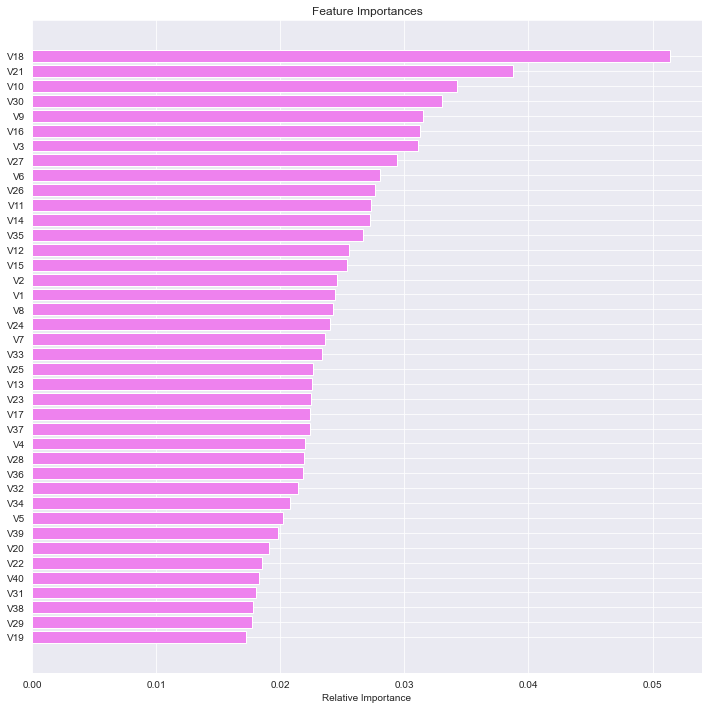

<IPython.core.display.Javascript object>

In [101]:
feature_names = X.columns
importances = xgb_tuned_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines

### Building pipeline

In [102]:
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])



# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
       
        
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes



<IPython.core.display.Javascript object>

In [103]:
# Creating new pipeline with best parameters
pipeline_model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                max_features=0.7,
                random_state=1,
                learning_rate=1,
                n_estimators=50,
                subsample=0.2,
            ),
        ),
    ]
)
# Fit the model on training data
pipeline_model.fit(X_train, y_train)

[22:04:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough', transformers=[])),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_features=0.7, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, ...))])

<IPython.core.display.Javascript object>

In [104]:
pipeline_model.score(X_train, y_train)

0.9815

<IPython.core.display.Javascript object>

In [105]:
pipeline_model.score(X_val, y_val)

0.9685

<IPython.core.display.Javascript object>

In [106]:
X1 = data2.drop(columns="Target")
Y1 = data2["Target"]

<IPython.core.display.Javascript object>

In [107]:
# Let's check the performance on test set
model_test = model_performance_classification_sklearn(pipeline_model, X_test, Y_test)
model_test

,Accuracy,Recall,Precision,F1
0,0.968,0.738,0.705,0.721


<IPython.core.display.Javascript object>

## Business Insights and Recommendations

### Insights

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

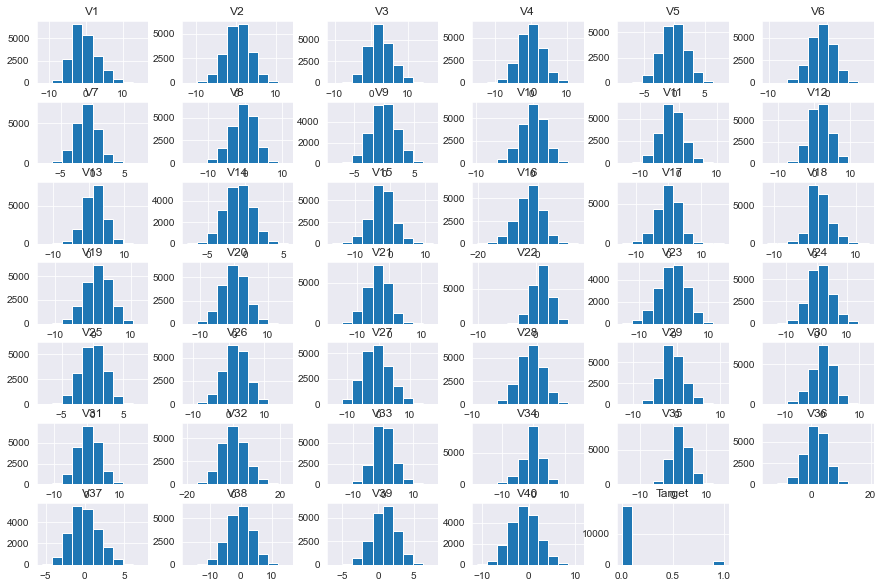

<IPython.core.display.Javascript object>

In [126]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

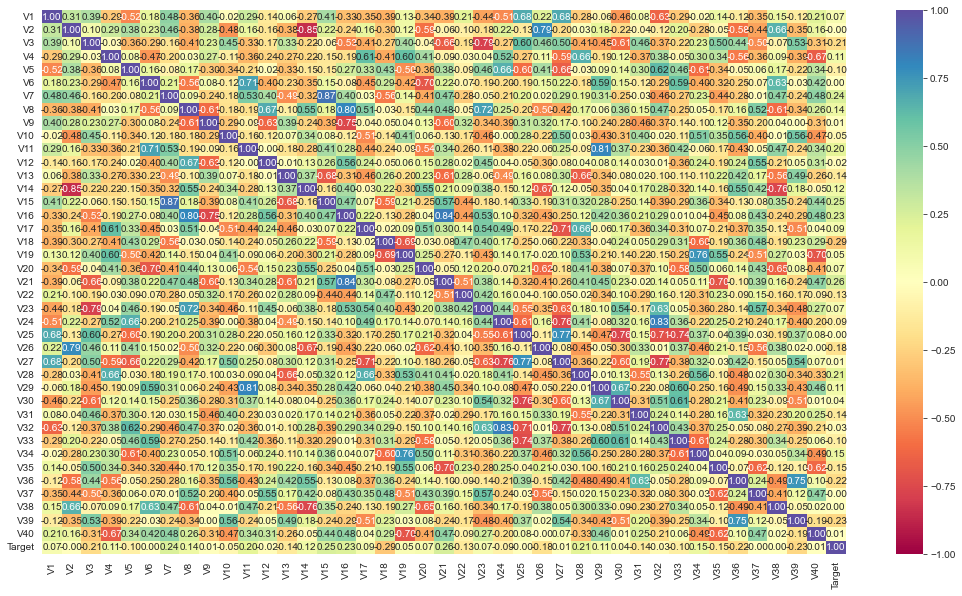

<IPython.core.display.Javascript object>

In [127]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- All the variables are evenly distributed.
- V1 and V2 from the training(18) and testing(5 and 6 respectively) datasets have missing values.
- Only 6% from both the traing and testing test is the reading as “failure” 
- V32 has the highest and lowest read from the is V32, with 26.38 and 17.2 respectively
- Correlation seems to be randomly distruted in the datasets.

## Model Building

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

In [128]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision tree tuned with undersampled data,AdaBoost classifier tuned with oversampled data,Gradientboost with undersampled data,XGBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.910,0.993,0.836,0.976,0.957
Recall,0.877,0.992,0.685,0.956,0.913
Precision,0.939,0.994,0.982,0.996,1.000
F1,0.907,0.993,0.807,0.976,0.955


<IPython.core.display.Javascript object>

In [129]:
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision tree tuned with undersampled data,AdaBoost classifier tuned with oversampled data,Gradientboost with undersampled data,XGBoost tuned with undersampled data,Random forest tuned with undersampled data
Accuracy,0.894,0.975,0.966,0.977,0.984
Recall,0.838,0.851,0.599,0.775,0.730
Precision,0.325,0.733,0.739,0.800,0.982
F1,0.468,0.787,0.662,0.787,0.837


<IPython.core.display.Javascript object>

- We can see that Xgboost is giving the highest cross-validated recall followed by Dtree, Randomforest, and GBM.

- We will tune the Xgboost, GMB, and Random-forest models and see if the performance improves.

- Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved

- All the models are giving a generalized performance on training and test set.

- The highest recall is .992% on the training set.

- However using a model that generally fir on validation set is sthe best practise, hence XGBoostClassifier.

- XGBoostClassifier  model minimizes real failures (False negatives (FN)) in a generator where there is no detection by model, therefore increasing the inspection cost, and decreasing maintenance, and repair cost.

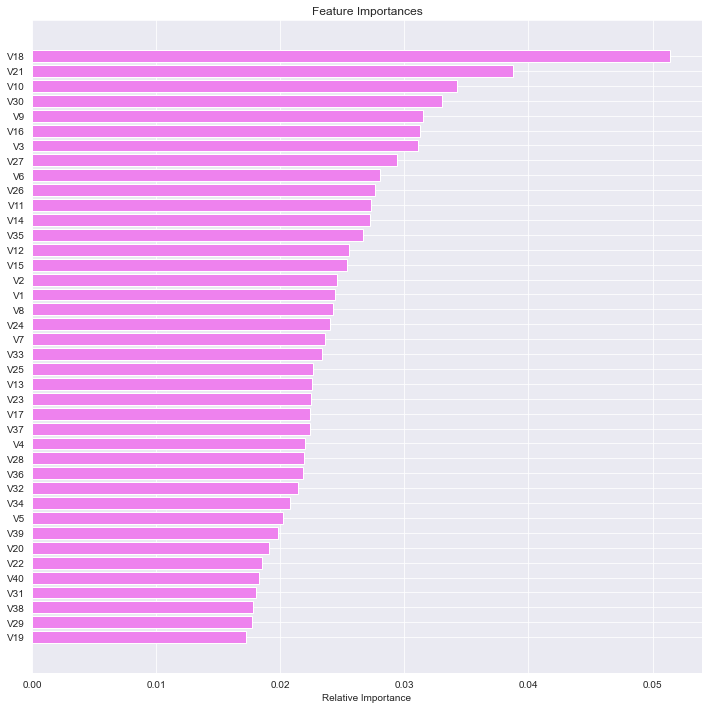

<IPython.core.display.Javascript object>

In [130]:
feature_names = X.columns
importances = xgb_tuned_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- V18 is the most important feature, followed by V21 and V21.

- V19 has the least important feature.

### Insights and Conclusion

- XGBoosClassifier is recomended for the best model in detecting failures in the generators.

- Data from various environmental factors like the temperature, humidity, wind speed, etc. are needed for predictive maintenace.

- I recomend inspecting the V32 sensor as it is gving both the highest and lowest readings.